# Monthly return on danish companies against ESG scores

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

# Read and clean data

        Companies  ESG Score
0    Novo Nordisk         85
1             DSV         81
2          Orsted         76
3       Carlsberg         77
4      Jyske Bank         53
5         Pandora         77
6           Tryg          68
7          Maersk         71
8       Coloplast         75
9     Danske Bank         75
10       Rockwool         69
11         Vestas         73
12  Royal Unibrew         62
13  GN Store Nord         74
14         Demant         56


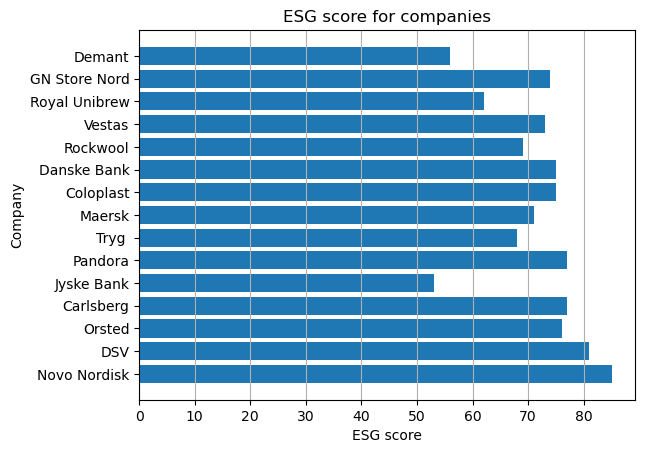

In [32]:
# read the csv-file including data of the ESG scores of 15 danish companies
df = pd.read_csv('Companies ESG scores.csv', delimiter=";")
print(df) # print the data

# create a bar plot illustrating the ESG scores of the companies
fig, ax = plt.subplots()
ax.barh(df['Companies'], df['ESG Score'])
ax.set_xlabel('ESG score')
ax.set_ylabel('Company')
ax.set_title('ESG score for companies')
ax.xaxis.grid(True)
plt.show()

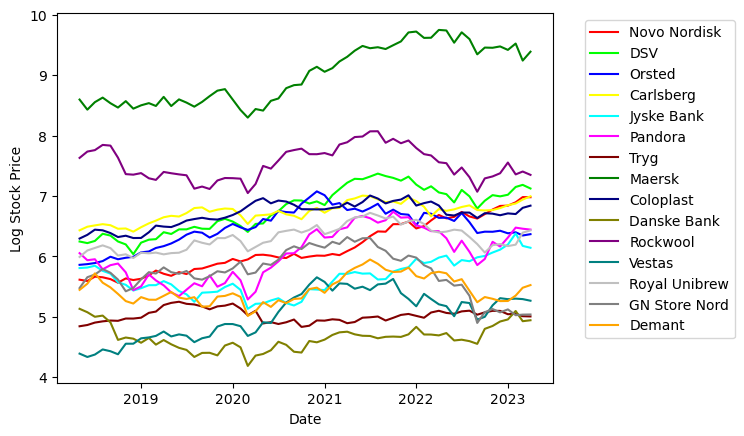

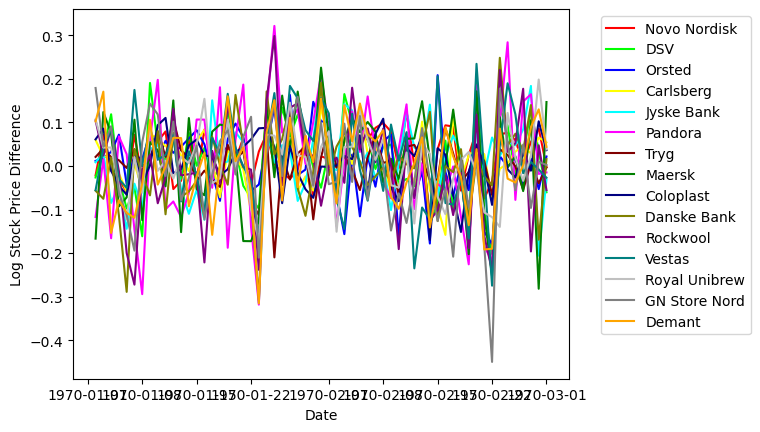

In [46]:
# read the csv-file including data of the monthly stock prices over the past five years
df1 = pd.read_csv('Monthly prices.csv', delimiter=';')

# convert date column to pandas datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

# compute log prices for each company
log_prices = np.log(df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']])

# replace original prices with log prices
df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']] = log_prices

# define a list of colors to use
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#800080', '#008080', '#C0C0C0', '#808080', '#FFA500']

# plot the log prices 
fig, ax = plt.subplots()
ax.set_xlabel('Date')

# format the dates
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Log Stock Price')

# loop over the companies giving them different colors in the plot
for i, company in enumerate(['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']):
    ax.plot(df1['Date'], df1[company], label=company, color=colors[i])

# add and adjust the size of the legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

# compute log difference
log_diff = log_prices.diff().dropna()

# plot the log difference
fig, ax = plt.subplots()
ax.set_xlabel('Date')
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Log Stock Price Difference')
for i, company in enumerate(['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']):
    ax.plot(log_diff.index, log_diff[company], label=company, color=colors[i])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


In [48]:
# compute the average of the log diff prices
avg_log_diff_prices = log_diff_prices.mean()*100

print(avg_log_diff_prices)

Novo Nordisk     2.315210
DSV              1.487937
Orsted           0.860728
Carlsberg        0.955115
Jyske Bank       0.569273
Pandora          0.660972
Tryg             0.275957
Maersk           1.343395
Coloplast        0.923066
Danske Bank     -0.321266
Rockwool        -0.476539
Vestas           1.484826
Royal Unibrew    0.746125
GN Store Nord   -0.742255
Demant           0.134878
dtype: float64


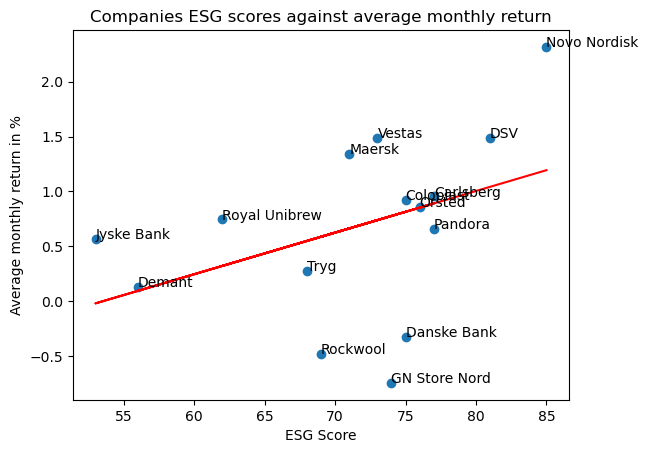

The slope of the trendline is: 0.04


In [49]:
# create a scatter plot plotting ESG scores against the average log diff prices of the companies
plt.scatter(df['ESG Score'], avg_log_diff_prices)
# add annotations
for i, txt in enumerate(df['Companies']):
    plt.annotate(txt, (df['ESG Score'][i], avg_log_diff_prices[i]))
# include a linear regression line
x = df['ESG Score']
y = avg_log_diff_prices
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.xlabel('ESG Score')
plt.ylabel('Average monthly return in %')
plt.title('Companies ESG scores against average monthly return')
plt.show()

print('The slope of the trendline is: {:.2f}'.format(m))


MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.